# Predicting Crime Rate in Chicago using Facebook Prophet
**Author** : Rahul Bordoloi

**Notebook used** : Google Colab





PROBLEM STATEMENT

- The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017. 
- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.
- Dataset contains the following columns: 
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
    - District: Indicates the police district where the incident occurred. 
    - Ward: The ward (City Council district) where the incident occurred. 
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. 
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.
- Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

# About Facebook Prophet

- Prophet is open source software released by Facebook’s Core Data Science team.

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 

- For more information, check out: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


# Importing the Libraries and Dataset

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet     #facebook prophet package

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#mounting GDrive with Colab Notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
chicago_df_1 = pd.read_csv('/content/drive/My Drive/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('/content/drive/My Drive/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('/content/drive/My Drive/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)
# error_bad_lines are used to ignore rows that are corrupted

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [0]:
#concatenating all the datasets together
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3], ignore_index=False, axis=0)

In [0]:
chicago_df.shape

(6017767, 23)

# Exploring the Dataset

In [0]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [0]:
chicago_df.tail(20)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456694,6246478,10508650,HZ250022,05/03/2016 05:00:00 PM,078XX S MARSHFIELD AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,611,6.0,17.0,71.0,03,1166708.0,1852625.0,2016,05/10/2016 03:56:50 PM,41.751166,-87.664670,"(41.751166357, -87.664670209)"
1456695,6246521,10508653,HZ250512,05/03/2016 11:58:00 PM,026XX W LE MOYNE ST,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENTIAL YARD (FRONT/BACK),True,False,1423,14.0,26.0,24.0,04A,1158381.0,1909870.0,2016,05/10/2016 03:56:50 PM,41.908427,-87.693623,"(41.908426978, -87.693622615)"
1456696,6247563,10508656,HZ250476,05/03/2016 03:15:00 PM,014XX N OGDEN AVE,1720,OFFENSE INVOLVING CHILDREN,CONTRIBUTE DELINQUENCY OF A CHILD,STREET,False,True,1822,18.0,27.0,8.0,20,1171322.0,1909588.0,2016,05/10/2016 03:56:50 PM,41.907378,-87.646092,"(41.907378476, -87.64609233)"
1456697,6247798,10508658,HZ250506,05/03/2016 11:50:00 PM,018XX S KEDZIE AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,1022,10.0,24.0,29.0,26,1155317.0,1890928.0,2016,05/10/2016 03:56:50 PM,41.856510,-87.705387,"(41.856510401, -87.705387422)"
1456698,6248016,10508659,HZ250499,05/03/2016 11:38:00 PM,038XX S PRINCETON AVE,0460,BATTERY,SIMPLE,CHA PARKING LOT/GROUNDS,False,False,915,9.0,3.0,34.0,08B,1174922.0,1879297.0,2016,05/10/2016 03:56:50 PM,41.824178,-87.633775,"(41.82417802, -87.6337748)"
1456699,6248192,10508661,HZ250344,05/03/2016 08:44:00 PM,070XX S WABASH AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,322,3.0,6.0,69.0,04B,1177941.0,1858411.0,2016,05/10/2016 03:56:50 PM,41.766797,-87.623332,"(41.766796861, -87.623332025)"
1456700,6248278,10508662,HZ250477,05/03/2016 08:00:00 AM,057XX S MICHIGAN AVE,5001,OTHER OFFENSE,OTHER CRIME INVOLVING PROPERTY,APARTMENT,False,False,232,2.0,20.0,40.0,26,1178135.0,1867058.0,2016,05/10/2016 03:56:50 PM,41.790521,-87.622359,"(41.790520722, -87.622358898)"
1456701,6248713,10508663,HZ250466,05/03/2016 10:10:00 PM,033XX W MARQUETTE RD,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,831,8.0,15.0,66.0,17,1155359.0,1859995.0,2016,05/10/2016 03:56:50 PM,41.771625,-87.706062,"(41.771625308, -87.706062047)"
1456702,6248779,10508664,HZ250486,05/03/2016 11:35:00 PM,083XX S CARPENTER ST,0560,ASSAULT,SIMPLE,RESIDENCE,True,True,613,6.0,21.0,71.0,08A,1170770.0,1849485.0,2016,05/10/2016 03:56:50 PM,41.742462,-87.649876,"(41.742462184, -87.649876395)"
1456703,6248999,10508665,HZ250448,05/03/2016 10:15:00 PM,095XX S LOOMIS ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,2213,22.0,21.0,73.0,14,1168707.0,1841343.0,2016,05/10/2016 03:56:50 PM,41.720164,-87.657669,"(41.720164061, -87.657669427)"


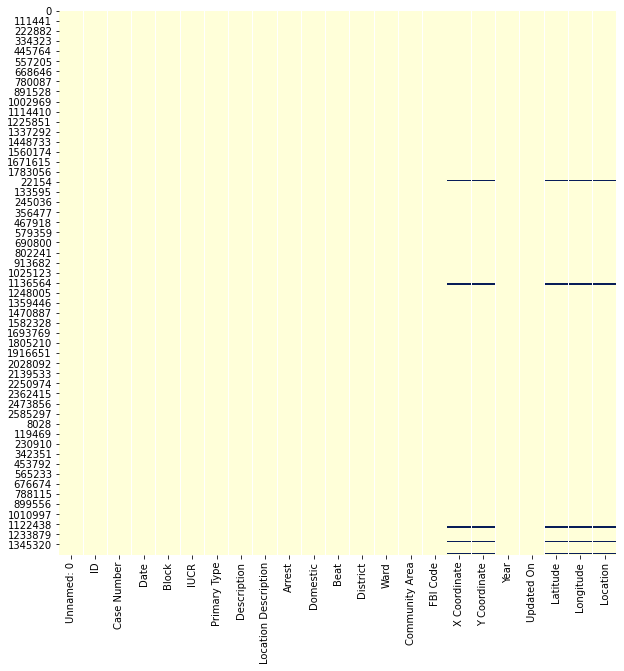

In [0]:
#visualizing and observing the null elements in the dataset
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')   #ploting missing data #cbar, cmap = colour bar, colour map

In [0]:
# Dropping the following columns: ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [0]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
1456709,10508679,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,10508680,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,10508681,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,10508690,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [0]:
#assembling a datetime by rearranging the dataframe column "Date" converting it to date-time format
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')  #I-Hour %p-AM/PM

In [0]:
chicago_df.Date 

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [0]:
# setting the index to be the date-time column 
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [0]:
#counting all the no of elements within a specific column 'Primary Type'
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [0]:
#top 15 cases
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [0]:
#indices of the top 15 cases
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

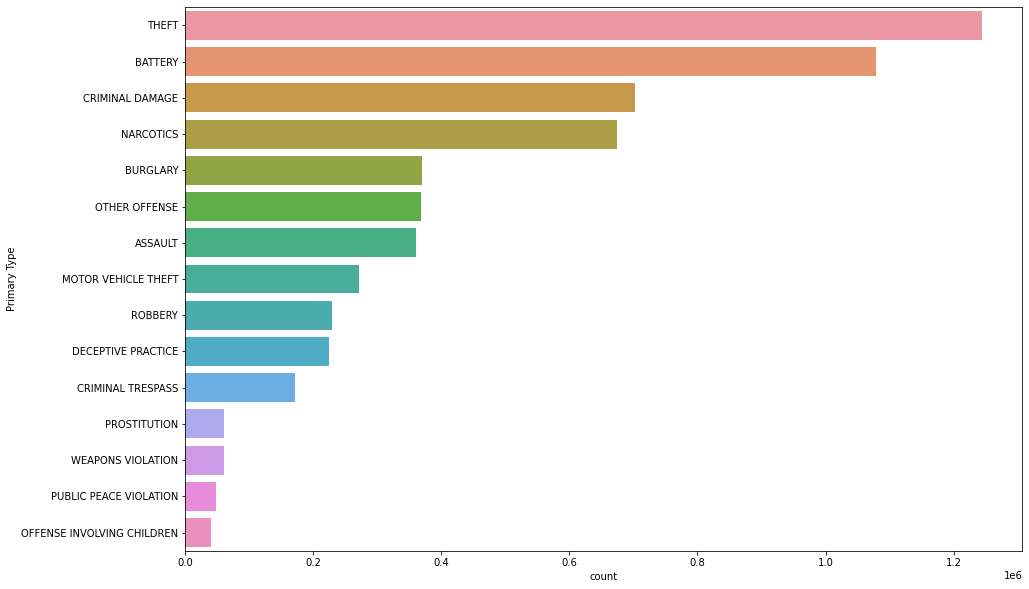

In [0]:
#plotting a bar plot for the top 15 cases
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type', data=chicago_df, order = order_data)

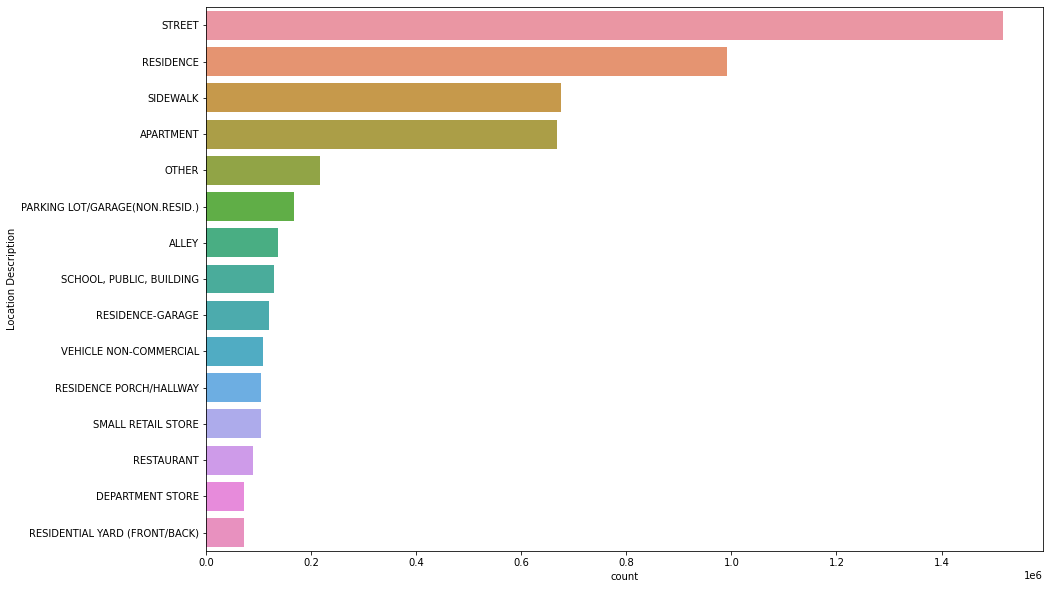

In [0]:
#Locations where the crimes happened
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [0]:
#count the no of crimes occuring in a particular year
chicago_df.resample('Y').size()
#resample is a convenience method for frequency conversion and resampling of time series. 

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

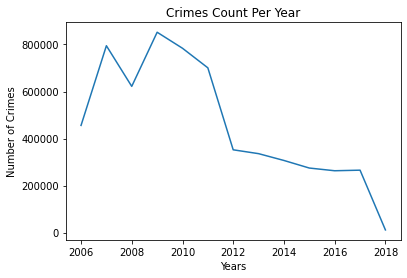

In [0]:
#plotting crimmes occuring each year vs no. of crimes happening in that year
plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [0]:
chicago_df.resample('M').size()         #over the period of 'M' Months

Date
2005-01-31    33983
2005-02-28    32042
2005-03-31    36970
2005-04-30    38963
2005-05-31    40572
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 145, dtype: int64

Text(0, 0.5, 'Number of Crimes')

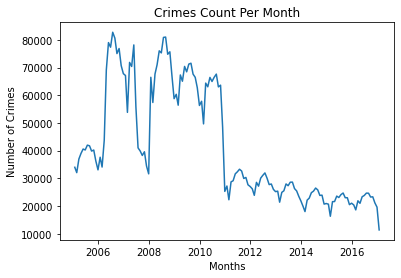

In [0]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [0]:
chicago_df.resample('Q').size()           #over the period of 'Q' Quaters

Date
2005-03-31    102995
2005-06-30    119769
2005-09-30    123550
2005-12-31    109497
2006-03-31    115389
2006-06-30    225489
2006-09-30    238423
2006-12-31    215383
2007-03-31    192791
2007-06-30    204361
2007-09-30    119086
2007-12-31    105610
2008-03-31    191523
2008-06-30    222331
2008-09-30    236695
2008-12-31    201504
2009-03-31    184055
2009-06-30    203916
2009-09-30    210446
2009-12-31    185483
2010-03-31    171848
2010-06-30    194453
2010-09-30    197116
2010-12-31    137274
2011-03-31     78167
2011-06-30     93064
2011-09-30     95835
2011-12-31     85000
2012-03-31     78574
2012-06-30     88283
2012-09-30     89685
2012-12-31     79128
2013-03-31     71651
2013-06-30     80776
2013-09-30     83510
2013-12-31     70766
2014-03-31     59964
2014-06-30     72991
2014-09-30     76090
2014-12-31     65482
2015-03-31     58503
2015-06-30     68239
2015-09-30     71782
2015-12-31     64471
2016-03-31     60843
2016-06-30     68085
2016-09-30     72500
2016-12-

Text(0, 0.5, 'Number of Crimes')

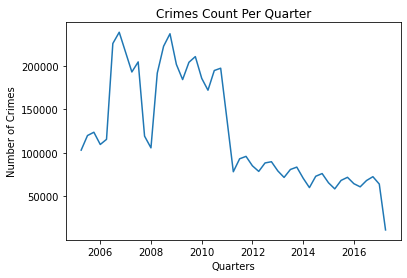

In [0]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# Preparing the Data for Prophet

In [0]:
#performing quality set index
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [0]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [0]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [0]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [0]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [0]:
chicago_prophet_df

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


# Making Future Predictions using Prophet

In [0]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [0]:
#renaming the columns into 'ds' and 'y' format for facebook prophet,
#formatting in 'M' for implementation
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [0]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [0]:
#instantiating prophet object
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
#forcasting into the future
future = m.make_future_dataframe(periods=720)  #periods = no. of days for prediction
forecast = m.predict(future)

In [0]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.736755,39573.592311,72147.031205,60454.736755,60454.736755,-4762.400048,-4762.400048,-4762.400048,-4762.400048,-4762.400048,-4762.400048,0.0,0.0,0.0,55692.336707
1,2005-02-28,60322.333828,34647.047189,67613.163141,60322.333828,60322.333828,-9500.508891,-9500.508891,-9500.508891,-9500.508891,-9500.508891,-9500.508891,0.0,0.0,0.0,50821.824937
2,2005-03-31,60175.744873,42031.565783,75825.219109,60175.744873,60175.744873,-1224.148242,-1224.148242,-1224.148242,-1224.148242,-1224.148242,-1224.148242,0.0,0.0,0.0,58951.596630
3,2005-04-30,60033.884593,45453.354838,77897.902534,60033.884593,60033.884593,1182.830385,1182.830385,1182.830385,1182.830385,1182.830385,1182.830385,0.0,0.0,0.0,61216.714978
4,2005-05-31,59887.295638,49314.203572,82762.570961,59887.295638,59887.295638,5498.250108,5498.250108,5498.250108,5498.250108,5498.250108,5498.250108,0.0,0.0,0.0,65385.545746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2019-01-17,5465.369009,-17026.416031,15377.873933,4980.189705,5907.861918,-5243.415089,-5243.415089,-5243.415089,-5243.415089,-5243.415089,-5243.415089,0.0,0.0,0.0,221.953920
861,2019-01-18,5452.302325,-16526.048948,15829.059617,4966.223132,5895.681474,-5243.952208,-5243.952208,-5243.952208,-5243.952208,-5243.952208,-5243.952208,0.0,0.0,0.0,208.350118
862,2019-01-19,5439.235642,-16345.054194,17161.143311,4952.256560,5883.501029,-5241.167658,-5241.167658,-5241.167658,-5241.167658,-5241.167658,-5241.167658,0.0,0.0,0.0,198.067985
863,2019-01-20,5426.168959,-17390.620250,16377.327397,4938.289987,5871.320585,-5233.516084,-5233.516084,-5233.516084,-5233.516084,-5233.516084,-5233.516084,0.0,0.0,0.0,192.652875


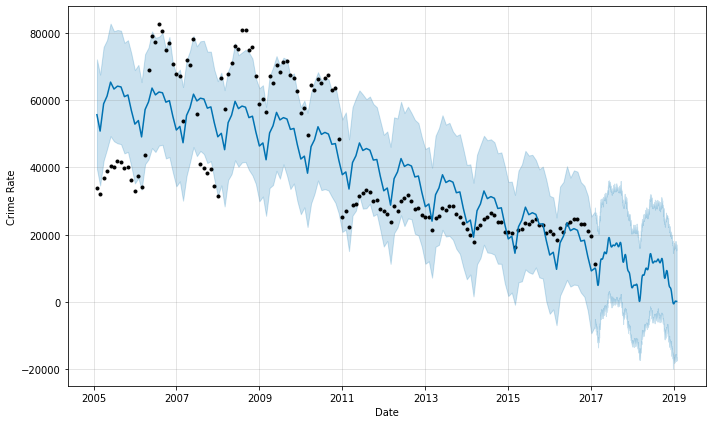

In [0]:
#visualizing future results
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

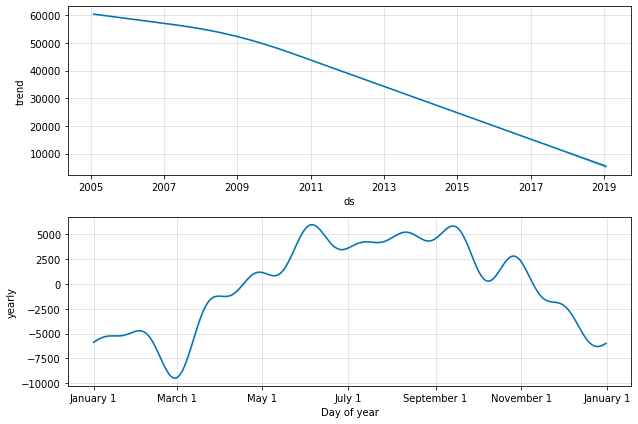

In [0]:
#expected trend in the future
figure3 = m.plot_components(forecast)

# End